### **Exercici 2**

Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv('movies.dat.txt', sep = '::', encoding = 'latin-1', header = None, engine='python')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

# movies2 = pd.DataFrame(movies)
movies.shape

(3883, 3)

In [3]:
movies.head(3)

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [4]:
movies = movies.drop(columns = [0])
movies = movies.rename(columns = {1 : 'Title Year', 2: 'Genre'}).copy()

movies.head(3)

,Title Year,Genre
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance


In [5]:
genre = movies['Genre'].str.split( '|', expand = True)
genre

,0,1,2,3,4,5
0,Animation,Children's,Comedy,None,None,None
1,Adventure,Children's,Fantasy,None,None,None
2,Comedy,Romance,None,None,None,None
3,Comedy,Drama,None,None,None,None
4,Comedy,None,None,None,None,None
...,...,...,...,...,...,...
3878,Comedy,None,None,None,None,None
3879,Drama,None,None,None,None,None
3880,Drama,None,None,None,None,None
3881,Drama,None,None,None,None,None


In [6]:
genre = genre.drop(columns = [1,2,3,4,5])
genre = genre.rename(columns = {0 : 'Genre'})
genre

,Genre
0,Animation
1,Adventure
2,Comedy
3,Comedy
4,Comedy
...,...
3878,Comedy
3879,Drama
3880,Drama
3881,Drama


In [7]:
Tit_Ye = movies['Title Year'].str.split('\ \(', expand = True)
Tit_Ye = Tit_Ye.rename(columns = {0: 'Title', 1: 'Year'})
Tit_Ye = Tit_Ye.drop(columns = [2,3])
Tit_Ye

,Title,Year
0,Toy Story,1995)
1,Jumanji,1995)
2,Grumpier Old Men,1995)
3,Waiting to Exhale,1995)
4,Father of the Bride Part II,1995)
...,...,...
3878,Meet the Parents,2000)
3879,Requiem for a Dream,2000)
3880,Tigerland,2000)
3881,Two Family House,2000)


In [8]:
Tit_Ye["Year"] = Tit_Ye["Year"].str.replace(r'\)', '', regex=True)
Tit_Ye

,Title,Year
0,Toy Story,1995
1,Jumanji,1995
2,Grumpier Old Men,1995
3,Waiting to Exhale,1995
4,Father of the Bride Part II,1995
...,...,...
3878,Meet the Parents,2000
3879,Requiem for a Dream,2000
3880,Tigerland,2000
3881,Two Family House,2000


In [9]:
moviesN = pd.concat([Tit_Ye, genre], axis = 1)
moviesN.head()

,Title,Year,Genre
0,Toy Story,1995,Animation
1,Jumanji,1995,Adventure
2,Grumpier Old Men,1995,Comedy
3,Waiting to Exhale,1995,Comedy
4,Father of the Bride Part II,1995,Comedy


### **Exercici 3**

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?  
Fes una o dues representacions gràfiques i justifica la teva elecció.

In [10]:
# sns.pairplot(moviesN, diag_kind='hist', plot_kws={'alpha': 0.4})

In [11]:
moviesN['Year'] = pd.to_numeric(moviesN['Year'], errors = 'coerce')
print(moviesN['Year'].isnull().sum())

269


In [12]:
movies_years_completos = moviesN[-pd.isnull(moviesN['Year'])]
print(movies_years_completos.isnull().sum())

Title    0
Year     0
Genre    0
dtype: int64


In [13]:
movies_genre = movies_years_completos.groupby('Genre')
movies_genre_cant = movies_genre.size()
movies_genre_ord = movies_genre_cant.sort_values(ascending = False)
movies_genre_ord

Genre
Drama          1031
Comedy          975
Action          480
Horror          241
Adventure       152
Crime           124
Documentary     117
Thriller         99
Children's       88
Animation        87
Sci-Fi           46
Romance          45
Mystery          36
Western          33
Musical          24
Film-Noir        24
War              10
Fantasy           2
dtype: int64

Como existen muchos géneros de peliculas, miraré la variación a través de los años, solo de los cinco géneros que más películas aparecen en el dataframe.  
Una vez ordernados, he selccionado: Drama, Comedy, Action, Horror, Adventure.

In [14]:
movies_years_pivot = movies_years_completos.pivot_table(index = 'Year', columns = 'Genre',aggfunc = 'count')
movies_years_pivot = movies_years_pivot.fillna(0)
movies_years_pivot.head()

Title                                                                \
Genre  Action Adventure Animation Children's Comedy Crime Documentary Drama   
Year                                                                          
1919.0    0.0       1.0       0.0        0.0    1.0   0.0         0.0   0.0   
1920.0    0.0       0.0       0.0        0.0    2.0   0.0         0.0   0.0   
1921.0    1.0       0.0       0.0        0.0    0.0   0.0         0.0   0.0   
1922.0    0.0       0.0       0.0        0.0    0.0   0.0         0.0   1.0   
1923.0    0.0       0.0       0.0        0.0    2.0   0.0         0.0   1.0   

                                                                              \
Genre  Fantasy Film-Noir Horror Musical Mystery Romance Sci-Fi Thriller  War   
Year                                                                           
1919.0     0.0       0.0    0.0     0.0     0.0     0.0    0.0      0.0  0.0   
1920.0     0.0       0.0    0.0     0.0     0.0     0.0    0.0      0.0  0.0   
1921.0     0.0       0.0    0.0     0.0     0.0     0.0    0.0      0.0  0.0   
1922.0     0.0       0.0    0.0     0.0     0.0     0.0    0.0      0.0  0.0   
1923.0     0.0       0.0    0.0     0.0     0.0     0.0    0.0      0.0  0.0   

                
Genre  Western  
Year            
1919.0     0.0  
1920.0     0.0  
1921.0     0.0  
1922.0     0.0  
1923.0     0.0

In [15]:
years = movies_years_completos['Year'].unique()
drama = movies_years_pivot['Title', 'Drama']
comedy = movies_years_pivot['Title', 'Comedy']
action = movies_years_pivot['Title', 'Action']
horror = movies_years_pivot['Title', 'Horror']
adventure = movies_years_pivot['Title', 'Adventure']

# movies_years_pivot[('Title', 'Drama'), ('Title', 'Comedy'), ('Title', 'Action'), ('Title', 'Horror'), ('Title', 'Adventure')]

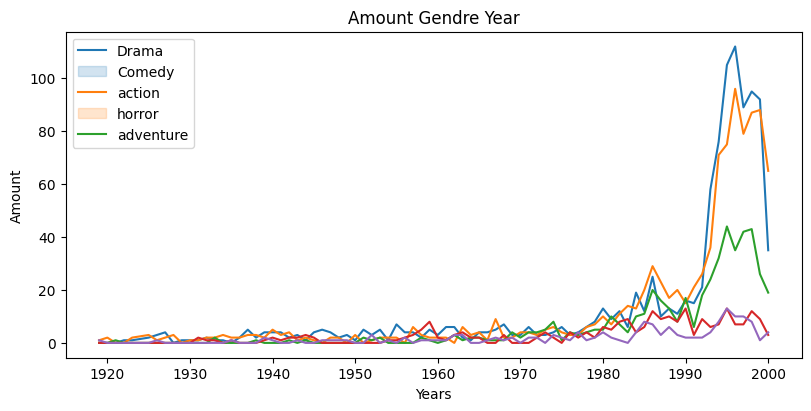

In [16]:
plt.figure(figsize=(8,4), layout='constrained')

sns.lineplot(drama)
sns.lineplot(comedy)
sns.lineplot(action)
sns.lineplot(horror)
sns.lineplot(adventure)

plt.xlabel('Years')
plt.ylabel('Amount')
plt.title("Amount Gendre Year")
plt.legend(['Drama', 'Comedy', 'action', 'horror', 'adventure'])
plt.show();

Se aprecia que la gran mayoria de las peliculas aparecen a partir de los años ochenta, donde además existe mas variación entre los géneros de las mismas.  
Para Poder apreciarlo mejor, selecciono los últimos veinte años.

In [17]:
movies_years_completos_80_00 = movies_years_completos[(movies_years_completos['Year'] > 1980) & (movies_years_completos['Year'] <= 2000)]

In [18]:
movies_years_pivot_80_00 = movies_years_completos_80_00.pivot_table(index = 'Year', columns = 'Genre', aggfunc = 'count')
movies_years_pivot_80_00 = movies_years_pivot_80_00.fillna(0)
movies_years_pivot_80_00.head()

Title                                                                \
Genre  Action Adventure Animation Children's Comedy Crime Documentary Drama   
Year                                                                          
1981.0   10.0       2.0       2.0        1.0    7.0   2.0         1.0   9.0   
1982.0    7.0       1.0       1.0        2.0   11.0   0.0         0.0  12.0   
1983.0    4.0       0.0       0.0        1.0   14.0   0.0         1.0   6.0   
1984.0   10.0       4.0       0.0        1.0   13.0   1.0         1.0  19.0   
1985.0   11.0       8.0       1.0        1.0   20.0   0.0         0.0  12.0   

                                                                              \
Genre  Fantasy Film-Noir Horror Musical Mystery Romance Sci-Fi Thriller  War   
Year                                                                           
1981.0     0.0       0.0    5.0     0.0     0.0     0.0    0.0      0.0  0.0   
1982.0     0.0       1.0    8.0     0.0     0.0     0.0    0.0      0.0  0.0   
1983.0     0.0       0.0    9.0     0.0     0.0     0.0    0.0      0.0  0.0   
1984.0     1.0       0.0    4.0     0.0     2.0     1.0    1.0      0.0  0.0   
1985.0     0.0       0.0    6.0     0.0     0.0     0.0    1.0      1.0  0.0   

                
Genre  Western  
Year            
1981.0     0.0  
1982.0     0.0  
1983.0     0.0  
1984.0     0.0  
1985.0     1.0

In [19]:
years_80_00 = movies_years_completos_80_00['Year'].unique()
drama_80_00 = movies_years_pivot_80_00['Title', 'Drama']
comedy_80_00 = movies_years_pivot_80_00['Title', 'Comedy']
action_80_00 = movies_years_pivot_80_00['Title', 'Action']
horror_80_00 = movies_years_pivot_80_00['Title', 'Horror']
adventure_80_00 = movies_years_pivot_80_00['Title', 'Adventure']


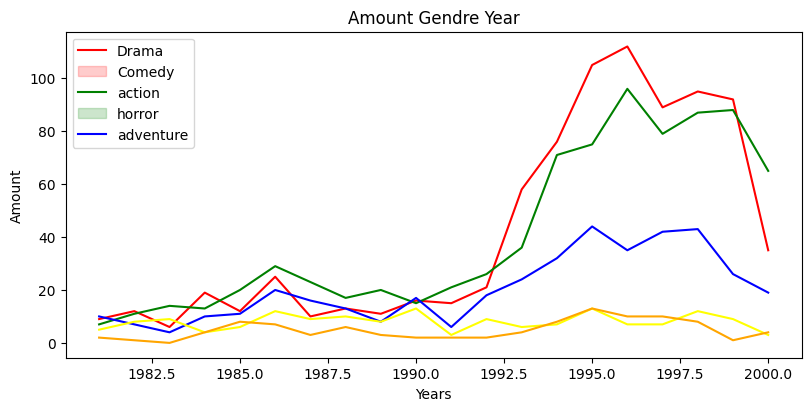

In [20]:
plt.figure(figsize=(8,4), layout='constrained')

sns.lineplot(drama_80_00, c = 'red')
sns.lineplot(comedy_80_00, c = 'green')
sns.lineplot(action_80_00, c = 'blue')
sns.lineplot(horror_80_00, c = 'yellow')
sns.lineplot(adventure_80_00, c = 'orange')

plt.xlabel('Years')
plt.ylabel('Amount')
plt.title("Amount Gendre Year")
plt.legend(['Drama', 'Comedy', 'action', 'horror', 'adventure'])
plt.show();

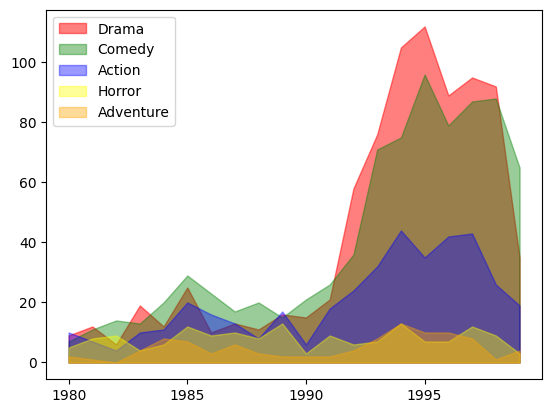

In [21]:
# library
import numpy as np
import matplotlib.pyplot as plt

# Create data
x= range(1980,2000)
y1 = drama_80_00
y2 = comedy_80_00
y3 = action_80_00
y4 = horror_80_00
y5 = adventure_80_00



# Area plot
plt.fill_between(x, y1, alpha = 0.5, label='Drama', color = 'red')
plt.fill_between(x, y2, alpha = 0.4, label='Comedy', color = 'green')
plt.fill_between(x, y3,alpha = 0.4, label='Action', color = 'blue')
plt.fill_between(x, y4, alpha = 0.4, label='Horror', color = 'yellow')
plt.fill_between(x, y5, alpha = 0.4, label='Adventure', color = 'orange')

plt.xticks(range(1980,2000,5), range(1980,2000,5))
plt.legend(loc = 'upper left')
plt.show()


La visualización de los últimos veinte años, nos revela que es a partir de los años noventa cuando se disparan la producción de tres géneros: Drama, Comedy y Action, especialmente los dos primeros.  
Si dieramos como hecho que la industria produce las peliculas en función de los gustos dela consumidor y no al revés, podríamos afirmar que entre los años noventa y los dosmil, el público mayoritariamente se inclinó hacia las peliculas de Drama y Comedia y en menor medida a las de acción, por encima de los demás géneros.  
Parece adivinarse una tendencia a la baja, hacia los años 2000, pero no se puede apreciar bien con los datos disponibles.
